In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0, "/content/drive/MyDrive/645")

In [ ]:
from brooks import *

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
demand_data = pd.read_excel("/content/drive/MyDrive/645/Datasets/ebony_demand.xlsx",sheet_name=0)

<Axes: ylabel='Count'>

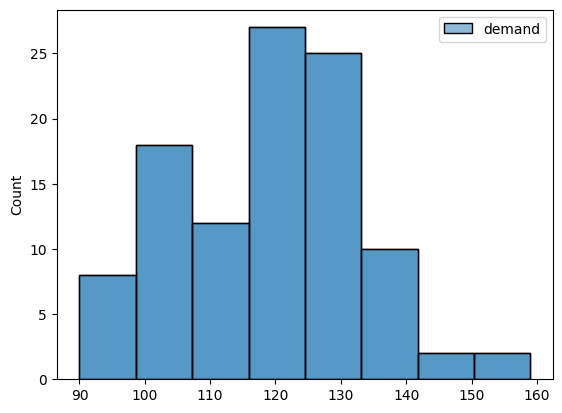

In [ ]:
import matplotlib.pyplot as plt

my_plot = sns.histplot(demand_data)
plt.savefig("/content/drive/MyDrive/645/demand_hist.png")
sns.histplot(demand_data)

In [ ]:
(demand_mean, demand_sd) = test_distribution(demand_data, distribution = "normal")

For a normal distribution, the mean estimate is 118.932692 and the standard deviation estimate is 14.229077.
The test statistic for a normal distribution is 10.877057 and the p-value is 0.144072.


In [ ]:
def ebony_simulation_choice(U, num_replications=1000, seed=12345):
    rg = np.random.default_rng(seed)
    L = 30  # Given in the problem
    holding_cost_per_unit = 30  # $30 per unit per week
    change_cost = 3000  # $3000 for changing the production level

    # List to store total cost for each replication
    total_costs = []

    for _ in range(num_replications):
        inventory = 60  # Initial inventory
        prev_production = 120  # Last week's production
        total_cost = 0  # Initialize total cost

        # Simulating for 52 weeks
        for _ in range(52):
            # Sample week demand using normal distribution
            week_demand = rg.normal(demand_mean, demand_sd)

            # Determine production based on the policy and inventory
            if inventory < L:
                production = 130
            elif inventory > U:
                production = 110
            else:
                production = prev_production  # Continue with previous week's production

            # Update inventory and costs
            inventory += production - week_demand
            holding_cost = max(inventory, 0) * holding_cost_per_unit
            change_cost_this_week = change_cost if production != prev_production else 0
            total_cost += holding_cost + change_cost_this_week

            # Update previous production for next week
            prev_production = production

        total_costs.append(total_cost)

    # Calculate expected cost and 95% credible interval
    expected_cost = np.mean(total_costs)
    lower_bound = np.percentile(total_costs, 2.5)
    upper_bound = np.percentile(total_costs, 97.5)

    return expected_cost, (lower_bound, upper_bound)

# Define U_values
U_values_choice = list(range(30, 90, 10))

# Simulate for each value of U using the choice approach
results_choice = {}
for U in U_values_choice:
    results_choice[U] = ebony_simulation_choice(U)

results_choice

{30: (116217.1093086814, (89309.1614717206, 140426.01295807003)),
 40: (108378.00304587063, (84817.83299921195, 128346.93837944875)),
 50: (105074.62423578741, (84488.6852807992, 124024.71689475047)),
 60: (104901.87484277353, (84903.79190025361, 124045.6505833797)),
 70: (107023.36174041303, (87468.57061537696, 126544.90405325247)),
 80: (110779.73641322547, (88377.36746314683, 132362.83001095464))}